In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist     # importing dataset
from keras.layers import Dense,Dropout  # using 2 basic layers for our prediction
%matplotlib inline
from keras.models import Sequential    # model we are using is sequential
from keras import utils # for categorical conversion 

Using TensorFlow backend.


In [3]:
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()
xtest.shape    # the image is in 3d we need to flatten the image 

(10000, 28, 28)

image is : 5


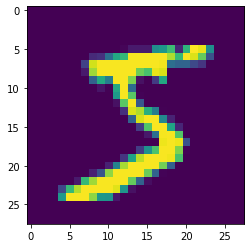

In [4]:
plt.imshow(xtrain[0])
print("image is :",ytrain[0])


image is : 0


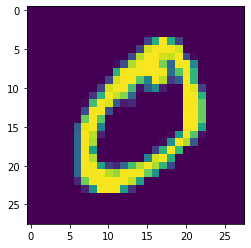

In [5]:
plt.imshow(xtrain[1])
print("image is :",ytrain[1])

In [6]:
xtrain=xtrain.reshape(60000,784)
xtest=xtest.reshape(10000,784)

In [7]:
# keras created layers only accept float data
xtrain=xtrain.astype("float32")
xtest=xtest.astype("float32")
xtrain=xtrain/255      # preprocessing
xtest=xtest/255

In [8]:
ytrain=utils.to_categorical(ytrain,10)
ytest=utils.to_categorical(ytest,10)

# Determining the Number of Neurons
There are many rule-of-thumb methods for determining the correct number of neurons to use in the hidden layers, such as the following:

- The number of hidden neurons should be between the size of the input layer and the size of the output layer.
- The number of hidden neurons should be 2/3 the size of the input layer, plus the size of the output layer.
- The number of hidden neurons should be less than twice the size of the input layer.


# Determining the Number of Hidden Layers

| Number of Hidden Layers | Result |

 0 - Only capable of representing linear separable functions or decisions.

 1 - Can approximate any function that contains a continuous mapping from one finite space to another.

 2 - Can represent an arbitrary decision boundary to arbitrary accuracy with rational activation functions and can      approximate any smooth mapping to any accuracy.

Deciding the number of hidden neuron layers is only a small part of the problem. 

You must also determine how many neurons will be in each of these hidden layers. 

This process is covered in the next section.

In [9]:
# creating model 
model=Sequential()
model.add(Dense(500,input_shape=(784,),activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(250,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(10,activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 500)               392500    
_________________________________________________________________
dropout_1 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 250)               125250    
_________________________________________________________________
dropout_2 (Dropout)          (None, 250)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2510      
Total params: 520,260
Trainable params: 520,260
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(loss="categorical_crossentropy",metrics=["accuracy"],optimizer="RMSprop")

In [11]:
model.fit(xtrain,ytrain,epochs=20,batch_size=124,validation_data=(xtest, ytest))


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 106us/step - loss: 0.2581 - accuracy: 0.9208 - val_loss: 0.1230 - val_accuracy: 0.9619
Epoch 2/20
60000/60000 [==============================] - 4s 69us/step - loss: 0.1096 - accuracy: 0.9664 - val_loss: 0.0847 - val_accuracy: 0.9742
Epoch 3/20
60000/60000 [==============================] - 4s 69us/step - loss: 0.0786 - accuracy: 0.9760 - val_loss: 0.0864 - val_accuracy: 0.9738
Epoch 4/20
60000/60000 [==============================] - 4s 75us/step - loss: 0.0631 - accuracy: 0.9805 - val_loss: 0.0699 - val_accuracy: 0.9801
Epoch 5/20
60000/60000 [==============================] - 4s 70us/step - loss: 0.0520 - accuracy: 0.9844 - val_loss: 0.0776 - val_accuracy: 0.9797
Epoch 6/20
60000/60000 [==============================] - 4s 68us/step - loss: 0.0447 - accuracy: 0.9863 - val_loss: 0.0688 - val_accuracy: 0.9819
Epoch 7/20
60000/60000 [==============================] - 4s 70us/

In [12]:
predict=model.evaluate(xtest,ytest)


10000/10000 [==============================] - 1s 108us/step


In [13]:
print("loss:",predict[0]*100,"\naccuracy:",predict[1]*100)

loss: 10.40435553333022 
accuracy: 98.3299970626831
